# Tasks for laboratory assignment 3

In [1]:
import sys

# Встановлюємо пакети прямо в папку поточного python.exe
!{sys.executable} -m pip install --upgrade pandas matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Додаємо для гарних графіків

# Моделі
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split # Обов'язково для валідації
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler # Для масштабування даних (важливо для класифікації)

# Налаштування стилю графіків
sns.set(style="whitegrid")
%matplotlib inline

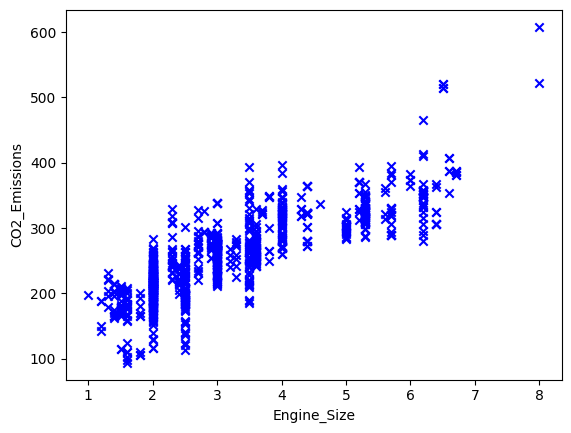

In [7]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [19]:
import pandas as pd

def extract_texts_from_file(file_path):
    """
    Завантажує дані з CSV файлу у Pandas DataFrame.
    
    Args:
        file_path (str): Шлях до файлу.
    
    Returns:
        pd.DataFrame: Завантажена таблиця даних.
    """
    try:
        # Основна магія тут: читаємо CSV
        data = pd.read_csv(file_path)
        print(f"Файл '{file_path}' успішно завантажено. Розмір: {data.shape}")
        return data
    except FileNotFoundError:
        # Якщо ти знову наплутаєш зі шляхами (наприклад, напишеш 'resources/' там, де його нема)
        # ми спробуємо завантажити файл просто за назвою
        filename = file_path.split('/')[-1]
        try:
            data = pd.read_csv(filename)
            print(f"Файл знайдено в корені як '{filename}'. Розмір: {data.shape}")
            return data
        except:
            print(f"ПОМИЛКА: Файл {file_path} не знайдено.")
            return None

# Тестуємо на heart.csv
# Якщо файл лежить просто поруч, скрипт це зрозуміє завдяки блоку except
data = extract_texts_from_file('resources/heart.csv') 

if data is not None:
    # Виводимо перші 5 рядків, а не 50 (щоб не засмічувати екран)
    print(data.head())

Файл 'resources/heart.csv' успішно завантажено. Розмір: (303, 14)
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

R^2 Score: 0.6420


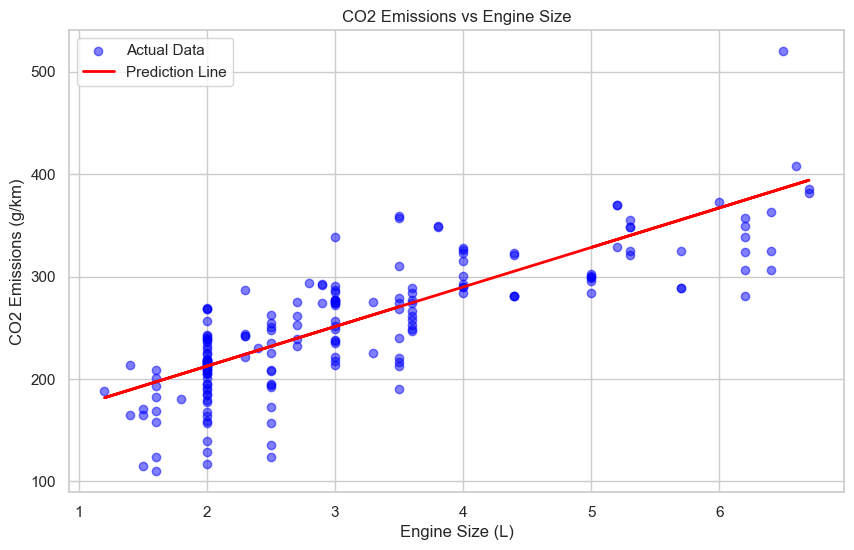

Model parameters (Theta): Intercept=135.41, Slope=38.62


[np.float64(135.41324486170805), np.float64(38.616765736036726)]

In [20]:

# Перевизначимо функцію завантаження, щоб вона повертала DataFrame
def extract_texts_from_file(file_path):
    return pd.read_csv(file_path)

def CO2_emissions(df):
    """
    Builds a model that predicts CO2 emissions from the size of the engine.
    Visualizes the model on a plot.

    Args:
        df: DataFrame containing CO2 emissions data.

    Returns:
        list: The list of model theta parameters [intercept, coefficient].
    """
    # 1. Вибір даних
    # X має бути 2D масивом, тому подвійні дужки [['Engine_Size']]
    X = df[['Engine_Size']]
    y = df['CO2_Emissions']

    # 2. Розділення на Train/Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Навчання моделі
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4. Прогноз
    y_pred = model.predict(X_test)

    # 5. Оцінка
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 Score: {r2:.4f}")

    # 6. Візуалізація
    plt.figure(figsize=(10, 6))
    # Малюємо точки (реальні дані)
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
    # Малюємо лінію регресії
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Line')
    
    plt.xlabel('Engine Size (L)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.title('CO2 Emissions vs Engine Size')
    plt.legend()
    plt.show()

    # Повертаємо параметри Theta (Intercept - вільний член, Coef - нахил)
    theta = [model.intercept_, model.coef_[0]]
    print(f"Model parameters (Theta): Intercept={theta[0]:.2f}, Slope={theta[1]:.2f}")
    return theta

# Виконання
# Переконайся, що файл лежить там, де треба. Якщо він в корені, прибери 'resources/'
data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

--- Ice Cream Sales Model ---
R^2 Score: -0.5751


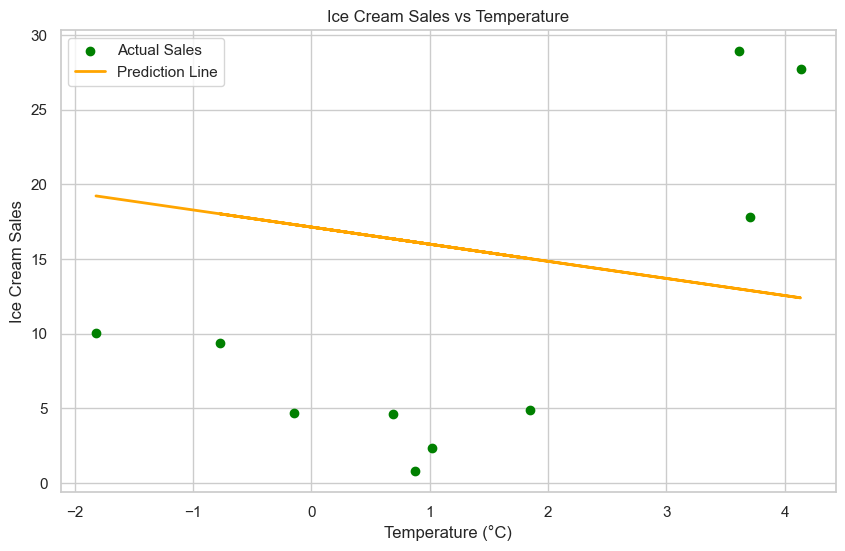

Theta: Intercept=17.14, Slope=-1.15


[np.float64(17.139213127718417), np.float64(-1.1465868642341401)]

In [21]:
def ice_cream_selling(df):
    """
    Build a model that predicts ice cream sales based on the temperature.
    Visualize model on a plot.

    Args:
        df: DataFrame containing ice cream sales data.

    Returns:
        list: The list of model theta parameters [intercept, coefficient].
    """
    # 1. Вибір даних
    # Перевіряємо назви колонок, бо в CSV вони можуть бути з пробілами або спецсимволами
    # Зазвичай там 'Temperature (°C)' та 'Ice Cream Sales (units)'
    # Використовуємо .values.reshape(-1, 1), щоб гарантовано отримати 2D масив для X
    
    # Спробуємо знайти колонки автоматично, якщо імена складні
    col_temp = [c for c in df.columns if 'Temperature' in c][0]
    col_sales = [c for c in df.columns if 'Sales' in c][0]
    
    X = df[[col_temp]]
    y = df[col_sales]

    # 2. Спліт
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Навчання (Linear Regression)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4. Прогноз
    y_pred = model.predict(X_test)

    # 5. Оцінка
    print(f"--- Ice Cream Sales Model ---")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")

    # 6. Візуалізація
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='green', label='Actual Sales')
    plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Prediction Line')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales')
    plt.title('Ice Cream Sales vs Temperature')
    plt.legend()
    plt.show()

    # Повертаємо параметри
    theta = [model.intercept_, model.coef_[0]]
    print(f"Theta: Intercept={theta[0]:.2f}, Slope={theta[1]:.2f}")
    return theta

# Виклик (переконайся, що шлях правильний)
data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).


--- Power Consumption Model ---
R^2 Score: 0.2071
Feature Weights:
  Temperature: 508.3505
  Humidity: -46.8065
  WindSpeed: -124.0788


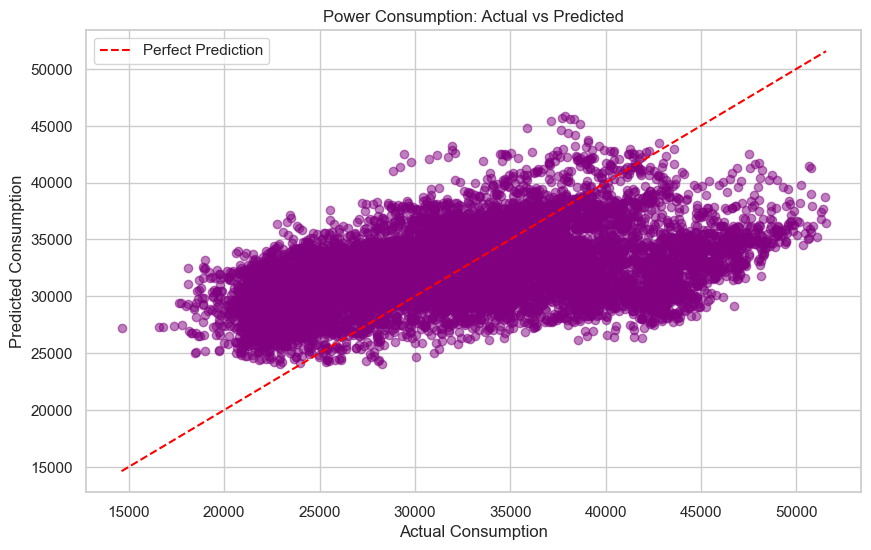

array([ 508.35046111,  -46.80647979, -124.07876728])

In [22]:
def power_consumption(df):
    """
    Build a model that predicts electricity consumption from weather: 
    temperature, humidity, and wind speed. Visualize model on a plot.

    Args:
        df: DataFrame containing power consumption data.

    Returns:
        list: The list of model theta parameters (coefficients).
    """
    # 1. Вибір даних
    # У цьому файлі колонки зазвичай: 'Temperature', 'Humidity', 'WindSpeed'
    # Цільова: 'PowerConsumption_Zone1'
    features = ['Temperature', 'Humidity', 'WindSpeed']
    target = 'PowerConsumption_Zone1'
    
    # Перевірка наявності колонок
    missing = [c for c in features + [target] if c not in df.columns]
    if missing:
        print(f"Error: Missing columns {missing}")
        return None

    X = df[features]
    y = df[target]

    # 2. Спліт
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Навчання
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4. Прогноз
    y_pred = model.predict(X_test)

    # 5. Оцінка
    print(f"\n--- Power Consumption Model ---")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
    
    print("Feature Weights:")
    for feat, coef in zip(features, model.coef_):
        print(f"  {feat}: {coef:.4f}")

    # 6. Візуалізація (Actual vs Predicted)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
    
    # Ідеальна лінія (x=y)
    line_coords = np.linspace(y_test.min(), y_test.max(), 100)
    plt.plot(line_coords, line_coords, color='red', linestyle='--', label='Perfect Prediction')
    
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.title('Power Consumption: Actual vs Predicted')
    plt.legend()
    plt.show()

    return model.coef_

# Виклик
data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Точність (Accuracy): 0.85

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



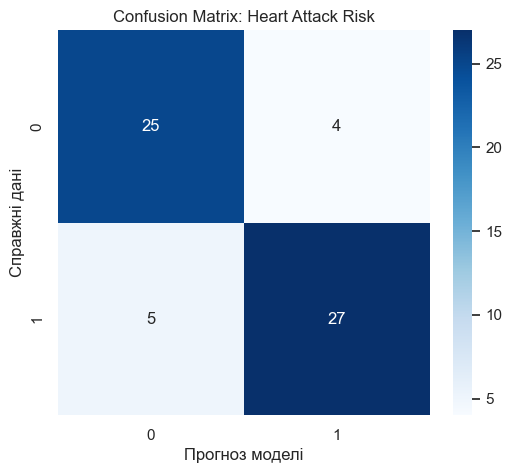

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def heart_classification():
    # 1. Завантаження
    df = pd.read_csv('resources/heart.csv')
    
    # Розділяємо дані
    X = df.drop('output', axis=1) # Всі колонки крім output
    y = df['output']              # Тільки output
    
    # 2. Спліт
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 3. Масштабування (ОБОВ'ЯЗКОВО для класифікації)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 4. Навчання (Логістична регресія)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # 5. Прогноз
    y_pred = model.predict(X_test_scaled)
    
    # 6. Оцінка
    print(f"Точність (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
    print("\nЗвіт класифікації:")
    print(classification_report(y_test, y_pred))
    
    # 7. Матриця плутанини
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix: Heart Attack Risk')
    plt.ylabel('Справжні дані')
    plt.xlabel('Прогноз моделі')
    plt.show()
    return None 

heart_classification()

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.

## Salary Prediction (Extra Task)

Process file `salary_dataset.csv`. A model, that would predict salary based on years of experience. Visualized on a plot. Simple linear regression. 

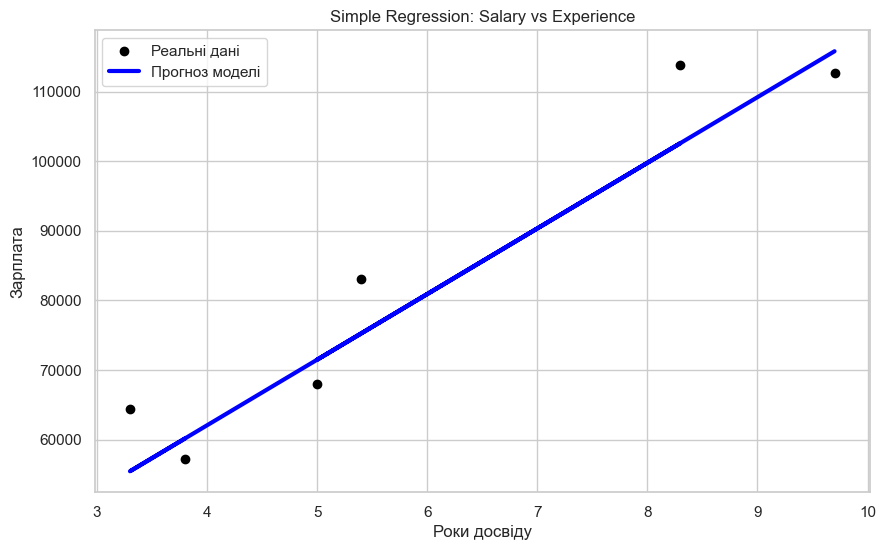

R^2 Score: 0.90
Коефіцієнт нахилу (k): 9423.82
Зсув (b): 24380.20


In [24]:
def task_simple_regression():
    # 1. Завантаження даних
    # Використовуємо salary_dataset як приклад простої регресії
    df = pd.read_csv('resources/salary_dataset.csv')
    
    # Видаляємо зайву колонку індексу, якщо вона є
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    X = df[['YearsExperience']] # Вхідні дані (2D масив)
    y = df['Salary']            # Цільові дані (Вектор)

    # 2. Розділення на тренувальну та тестову вибірки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Навчання моделі
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4. Прогноз
    y_pred = model.predict(X_test)

    # 5. Візуалізація
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='black', label='Реальні дані')
    plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Прогноз моделі')
    plt.xlabel('Роки досвіду')
    plt.ylabel('Зарплата')
    plt.title('Simple Regression: Salary vs Experience')
    plt.legend()
    plt.show()

    # 6. Вивід коефіцієнтів
    print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
    print(f"Коефіцієнт нахилу (k): {model.coef_[0]:.2f}")
    print(f"Зсув (b): {model.intercept_:.2f}")

# Виклик функції
task_simple_regression()